AIDA 2157 — Week 2 Lab
Part 2: Implementing the Algorithm Design in the IDE

Name: Kelsey Biberdorf
Date: January 15, 2025

This notebook represents the analysis view of the algorithm designed in Part 1.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

print("Environment ready")
print("pandas version:", pd.__version__)

Environment ready
pandas version: 2.3.3


In [2]:
numeric_features = [
    "gpa",
    "projects_count",
    "capstone_score",
    "attendance_pct",
    "internship_months",
    "work_exp_months",
    "github_commits_3mo",
    "interview_practice_hours",
]

categorical_features = [
    "program_stream",
    "co_op_status",
    "portfolio_quality",
    "communication_rating",
]

time_features = [
    "last_project_days_ago",
    "last_resume_update_days_ago",
]

label_col = "got_job_6mo"

In [3]:
rows = [
  [1,  3.7, 6, 92, 95, 8, 18, 220, 25, "AI",       "yes", "high",   "high",   14, 10, 1],
  [2,  3.2, 4, 78, 88, 4, 10,  90, 12, "Data",     "yes", "medium", "medium", 21, 18, 1],
  [3,  2.8, 3, 70, 80, 0,  6,  25,  4, "Software", "no",  "low",    "medium", 40, 55, 0],
  [4,  3.9, 7, 96, 98,12, 24, 340, 30, "AI",       "yes", "high",   "high",    7,  6, 1],
  [5,  3.0, 2, 68, 75, 0,  0,  10,  2, "Data",     "no",  "low",    "low",    65, 90, 0],

  [6,  3.4, 5, 85, 92, 6, 12, 150, 18, "Software", "yes", "medium", "high",   18, 12, 1],
  [7,  2.6, 1, 60, 70, 0,  3,   5,  1, "Software", "no",  "low",    "low",    80,120, 0],
  [8,  3.1, 4, 74, 86, 2,  9,  60, 10, "Data",     "yes", "medium", "medium", 30, 25, 0],
  [9,  3.6, 6, 90, 96, 8, 15, 210, 20, "AI",       "yes", "high",   "medium", 12,  9, 1],
  [10, 2.9, 3, 72, 84, 0,  8,  35,  6, "Data",     "no",  "medium", "medium", 45, 40, 0],

  [11, 3.3, 5, 82, 90, 4, 11, 120, 15, "Software", "yes", "medium", "high",   16, 14, 1],
  [12, 3.8, 7, 94, 97,10, 20, 300, 28, "AI",       "yes", "high",   "high",    9,  8, 1],
  [13, 3.0, 4, 76, 88, 0,  7,  55,  8, "Software", "no",  "medium", "medium", 33, 28, 0],
  [14, 3.5, 6, 88, 93, 6, 14, 190, 19, "Data",     "yes", "high",   "medium", 15, 11, 1],
  [15, 2.7, 2, 64, 78, 0,  4,  18,  3, "Software", "no",  "low",    "medium", 70,100, 0],

  [16, 3.2, 5, 80, 91, 3,  9, 110, 14, "Data",     "yes", "medium", "high",   20, 16, 1],
  [17, 3.1, 4, 79, 87, 2,  8,  85, 11, "AI",       "no",  "medium", "medium", 28, 22, 0],
  [18, None,5, 83, 89, 4, 12, 130, 16, "Software", "yes", "medium", "high",   19, 15, 1],
  [19, 3.4, 6, 86, 92, 5, 13, 160, 17, "Data",     "yes", "high",   "high",   17, 13, 1],
  [20, 3.9, 8, 98, 99,12, 30, 9999,35, "AI",       "yes", "high",   "high",    5,  4, 1],
]

cols = ["student_id"] + numeric_features + categorical_features + time_features + [label_col]
df = pd.DataFrame(rows, columns=cols)

df.head()

,student_id,gpa,projects_count,capstone_score,attendance_pct,internship_months,work_exp_months,github_commits_3mo,interview_practice_hours,program_stream,co_op_status,portfolio_quality,communication_rating,last_project_days_ago,last_resume_update_days_ago,got_job_6mo
0,1,3.7,6,92,95,8,18,220,25,AI,yes,high,high,14,10,1
1,2,3.2,4,78,88,4,10,90,12,Data,yes,medium,medium,21,18,1
2,3,2.8,3,70,80,0,6,25,4,Software,no,low,medium,40,55,0
3,4,3.9,7,96,98,12,24,340,30,AI,yes,high,high,7,6,1
4,5,3.0,2,68,75,0,0,10,2,Data,no,low,low,65,90,0


In [4]:
df.shape

(20, 16)

In [5]:
df.isna().sum()

student_id                     0
gpa                            1
projects_count                 0
capstone_score                 0
attendance_pct                 0
internship_months              0
work_exp_months                0
github_commits_3mo             0
interview_practice_hours       0
program_stream                 0
co_op_status                   0
portfolio_quality              0
communication_rating           0
last_project_days_ago          0
last_resume_update_days_ago    0
got_job_6mo                    0
dtype: int64

In [6]:
df[label_col].value_counts()

got_job_6mo
1    12
0     8
Name: count, dtype: int64

In [7]:
df["github_commits_3mo"].sort_values(ascending=False).head()

19    9999
3      340
11     300
0      220
8      210
Name: github_commits_3mo, dtype: int64

In [8]:
df.dtypes

student_id                       int64
gpa                            float64
projects_count                   int64
capstone_score                   int64
attendance_pct                   int64
internship_months                int64
work_exp_months                  int64
github_commits_3mo               int64
interview_practice_hours         int64
program_stream                  object
co_op_status                    object
portfolio_quality               object
communication_rating            object
last_project_days_ago            int64
last_resume_update_days_ago      int64
got_job_6mo                      int64
dtype: object

In [9]:
df[numeric_features].describe()

,gpa,projects_count,capstone_score,attendance_pct,internship_months,work_exp_months,github_commits_3mo,interview_practice_hours
count,19.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,3.268421,4.650000,80.750000,88.400000,4.300000,11.650000,615.600000,14.700000
std,0.394479,1.843195,10.681391,7.816312,4.027537,7.198501,2210.628427,9.619607
min,2.600000,1.000000,60.000000,70.000000,0.000000,0.000000,5.000000,1.000000
25%,3.000000,3.750000,73.500000,85.500000,0.000000,7.750000,50.000000,7.500000
50%,3.200000,5.000000,81.000000,89.500000,4.000000,10.500000,115.000000,14.500000
75%,3.550000,6.000000,88.500000,93.500000,6.500000,14.250000,195.000000,19.250000
max,3.900000,8.000000,98.000000,99.000000,12.000000,30.000000,9999.000000,35.000000


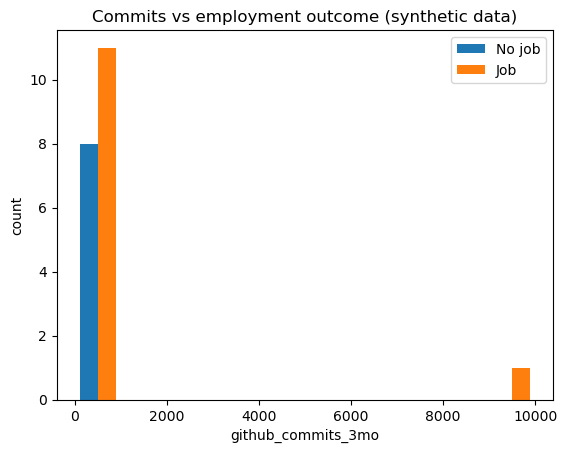

In [10]:
yes = df[df[label_col] == 1]["github_commits_3mo"].dropna()
no  = df[df[label_col] == 0]["github_commits_3mo"].dropna()

plt.figure()
plt.hist([no, yes], bins=10, label=["No job", "Job"])
plt.xlabel("github_commits_3mo")
plt.ylabel("count")
plt.title("Commits vs employment outcome (synthetic data)")
plt.legend()
plt.show()

#### Observation
The more Github commits a student has, the more likely they are to find a job within six months of graduating

#### Limitation
The dataset is small and sythetic making it hard to know if there is any statistical significance or if it has real world applications.

#### Reason Insight Could be Misleading
There is a very large outlier in the commits (9999), this skews all the data and could result in the number of commits being less significant when determining if a student will have a job within six months of graduation or not.
